<a href="https://colab.research.google.com/github/Falcon714/-/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
plt.rcParams['figure.figsize'] = (15.0, 10.0) 

In [2]:
train,target=make_blobs(n_samples=1500,n_features=2,centers=[[1,3],[4,1],[6,5]])

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.25,
                                                   random_state=1)

In [3]:
def minkowski_distance(a, b, p=2):
    
    dim = len(a)
  
    distance = 0
    
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance

In [4]:
len(X_train)
len(y_train)
len(X_test)
len(y_test)

375

In [5]:
#1. Функция  для двух точек
M = np.cov(np.transpose(X_train))
M_inv = np.linalg.inv(M)
X_T = np.transpose(X_train)

distance.mahalanobis(X_train[1],X_train[2], M_inv)

3.2847740939450047

In [6]:
np.transpose(X_train).shape

(2, 1125)

In [7]:
M

array([[5.18119762, 1.38478325],
       [1.38478325, 3.47946767]])

In [8]:
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
def mahalanobis_distance(x=None, data=None, cov=None):

    x_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu)
    return mahal.diagonal()

In [9]:
test_pt = [4.8, 2.7]

# Считаем расстояние между test_pt и всеми точками в X
distances = []

for i in X_train:
    distances.append(minkowski_distance(test_pt, i))


df_dists = pd.DataFrame(data=distances, columns=['dist'])
df_dists

,dist
0,5.631004
1,3.557224
2,4.782866
3,1.821841
4,1.746898
...,...
1120,4.555317
1121,4.227332
1122,5.245303
1123,1.749638


In [10]:
#3. Сортируем расстояния, чтобы найти ближайшие точки (сейчас топ 5)
df_nn = df_dists.sort_values(by=['dist'], axis=0)[:5]
df_nn

,dist
1000,0.048011
85,0.107971
727,0.156333
603,0.255789
828,0.333500


In [11]:
from collections import Counter

counter = Counter(y_train[df_nn.index])

# получаем самый частый ответ 

counter.most_common()[0][0]
print(counter)

Counter({1: 4, 2: 1})


In [12]:
def knn_predict(X_train, X_test, y_train, y_test, k, M):
    
    # счетчик для упрощения выбора, какая это зона
    from collections import Counter
    
    y_hat_test = []

    #для каждой точки в тесте
    for test_point in X_test:
        distances = []
        #сравниваем с тренировочными точками, считая их расстояния
        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, M)
            distances.append(distance)
        
        # Сохраняем расстояния
        df_dists = pd.DataFrame(data=distances, columns=['dist'])
        
        # Сортируем, выбирая K ближайших точек
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        counter = Counter(y_train[df_nn.index])

        prediction = counter.most_common()[0][0]
        
        # сохраняем ответ
        y_hat_test.append(prediction)
        
    return y_hat_test


# Make predictions on test dataset
y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=10, M=7)

In [13]:
print(accuracy_score(y_test, y_hat_test))

0.9706666666666667


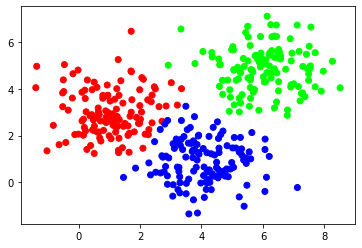

In [15]:
#Полученный результат
classColormap  = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

plt.scatter(X_test[:, 0], X_test[:, 1], c = y_hat_test, cmap=classColormap)
plt.show() 

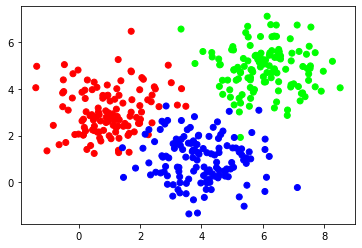

In [16]:
#Как на самом деле
classColormap  = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, cmap=classColormap)
plt.show() 

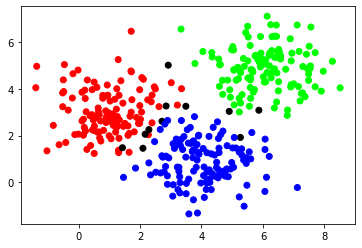

In [18]:
y_diff = []
i = 0
while i < len(y_hat_test):
  if y_hat_test[i] != y_test[i]:
    y_diff.append('3');
  else:
    y_diff.append(y_hat_test[i])
  i+=1

#пересечение
classColormap  = ListedColormap(['#FF0000', '#0000FF', '#00FF00','#000000'])
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_diff, cmap=classColormap)
plt.show() 